# Grand Average Analysis- Full Study - 2020 edition

In this file we investigate the grand average of all subjets in the AALIS study with respect to the oddball effect. This analysis uses data from all of the 48 usable subjects.

_The results show:_
- Oscillitory activity seems to increase in P/O during mind wandering
- There is a possible diminished P2 centered around Fz 

---

This notebook reads in the *-ave.fif evoked files from individual subjects that were produced by the individual subject preprocessing notebooks. 

Assumes that the data from each subject are in a sub-folder named for that subject, and that these subject sub-folders are in the same folder as this script.

---
Based on work by Aaron J Newman; Copyright (c) 2016 Aaron J Newman, NeuroCognitive Imaging Lab, Dalhousie University

This program is free software; you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation; either version 2 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program; if not, write to the Free Software Foundation, Inc., 51 Franklin Street, Fifth Floor, Boston, MA 02110-1301, USA.

---

In [1]:
# This is an attempt to produce the results without repeating the analytical steps using the evokeds files.

%matplotlib inline
import matplotlib as plt
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300  
figsize=(4, 4)

import mne
import mne.stats
import numpy as np
mne.set_log_level('error')

data_path = '.'

subjects = [
    '01',
    '02',
    '03',
    '04',
    '05',
    '06',
    '07',
    '08',
    '09',
    '10', 
    '11',
    #participant 12 excluded from all analysis due to an unfixable technical error - amplifier recording error f 
    '13',
    '14', 
    '15',
    '16',
    '17',
    '18',
    '19',
    '20',
    '21',
    '22',
    '23',
    '24', 
    '25', 
    '26', 
    '27',
    '28',
    '29',
    '30',
    '31',
    '32',
    '33',
    '34',
    '35', 
    #participant 36 excluded from all analysis due to an unfixable technical error - amplifier recording error f 
    '37',
    '38',
    '39', 
    '40',
    '41', 
    '42',
    '43', 
    '44', 
    '45',
    #participant 46 excluded from all analysis due to an unfixable technical error - too many head movements f
    #participant 47 excluded from all analysis because of a technical error with mastoids m
    '48',
    '49',
    '50',
    '51',
    '52',
]

## Retrieve evokeds

In [2]:
evoked = {}
for subject in subjects:
    evoked[subject] = mne.read_evokeds(str(data_path + '/' + subject + '/eeg_recordings/' + 'aalis-' + subject + '-ave.fif'))

## Create grand averages of each condition

In [3]:
gavg = {} # hold the gavg condition

# specify the conds
conds = [
    'Unlabelled/Standard',
    'Unlabelled/Oddball',
    'MW1/Standard',
    'MW2/Standard',
    'MW3/Standard',
    'MW4/Standard',
    'MW5/Standard',
    'MW1/Oddball',
    'MW2/Oddball',
    'MW3/Oddball',
    'MW4/Oddball',
    'MW5/Oddball'
] 

# manually specify labels for this analysis

c = [] #contain the evokeds
for subj in subjects:
    for x in evoked[subj]:
        if x.comment == 'MW1/Standard':
            x.comment == 'OT/Standard'
            c.append(x)
        if x.comment == 'MW2/Standard':
            x.comment == 'OT/Standard'
            c.append(x)

gavg['OT/Standard'] = mne.grand_average(c)

c = [] #contain the evokeds
for subj in subjects:
    for x in evoked[subj]:
        if x.comment == 'MW4/Standard':
            x.comment == 'MW/Standard'
            c.append(x)
        if x.comment == 'MW5/Standard':
            x.comment == 'MW/Standard'
            c.append(x)

gavg['MW/Standard'] = mne.grand_average(c)
    
c = [] #contain the evokeds
for subj in subjects:
    for x in evoked[subj]:
        if x.comment == 'MW1/Oddball':
            x.comment == 'OT/Oddball'
            c.append(x)
        if x.comment == 'MW2/Oddball':
            x.comment == 'OT/Oddball'
            c.append(x)

gavg['OT/Oddball'] = mne.grand_average(c)

c = [] #contain the evokeds
for subj in subjects:
    for x in evoked[subj]:
        if x.comment == 'MW4/Oddball':
            x.comment == 'MW/Oddball'
            c.append(x)
        if x.comment == 'MW5/Oddball':
            x.comment == 'MW/Oddball'
            c.append(x)

gavg['MW/Oddball'] = mne.grand_average(c)
    
gavg_back = gavg

gavg

{'OT/Standard': <Evoked  |  'Grand average (n = 83)' (average, N=83), [-0.19922, 1] sec, 32 ch, ~242 kB>,
 'MW/Standard': <Evoked  |  'Grand average (n = 52)' (average, N=52), [-0.19922, 1] sec, 32 ch, ~242 kB>,
 'OT/Oddball': <Evoked  |  'Grand average (n = 83)' (average, N=83), [-0.19922, 1] sec, 32 ch, ~242 kB>,
 'MW/Oddball': <Evoked  |  'Grand average (n = 51)' (average, N=51), [-0.19922, 1] sec, 32 ch, ~242 kB>}

## Recalculate baselines - These seem to be skewed by the gavg process

In [4]:
gavg['OT/Standard'].data = mne.baseline.rescale(gavg['OT/Standard'].data, times=gavg['OT/Standard'].times, baseline=(None,0))
gavg['MW/Standard'].data = mne.baseline.rescale(gavg['MW/Standard'].data, times=gavg['MW/Standard'].times, baseline=(None,0))
gavg['OT/Oddball'].data = mne.baseline.rescale(gavg['OT/Oddball'].data, times=gavg['OT/Oddball'].times, baseline=(None,0))
gavg['MW/Oddball'].data = mne.baseline.rescale(gavg['MW/Oddball'].data, times=gavg['MW/Oddball'].times, baseline=(None,0))

## Topoplots

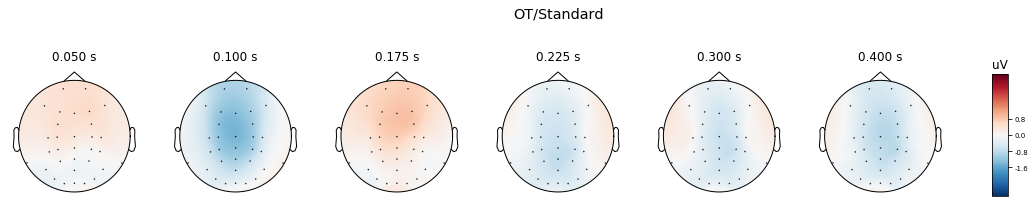

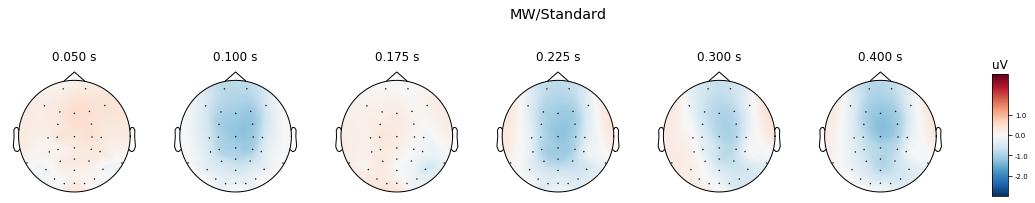

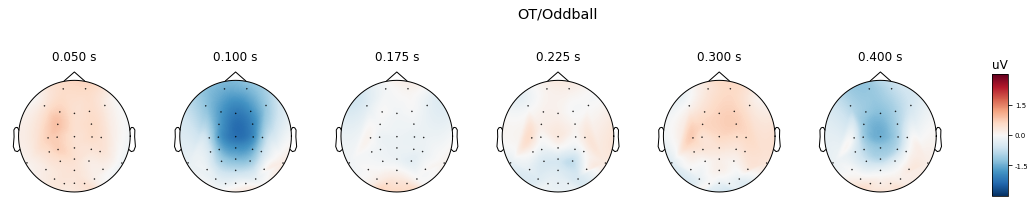

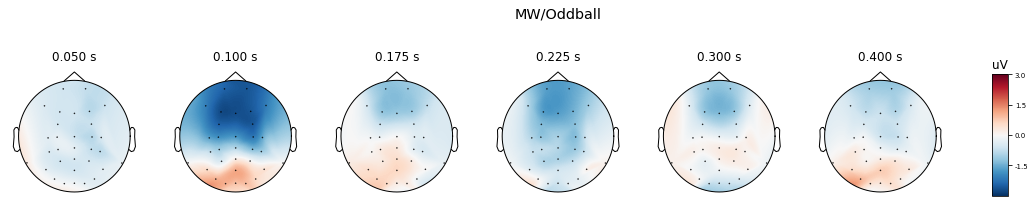

In [5]:
# these plots have the same vmin and vmax

%matplotlib inline

times = [0.05, 0.1, 0.175, 0.225, 0.3, 0.4] # change these as needed

for cond in gavg:
    [gavg[cond].plot_topomap(times=times, 
                             average=0.050,
                             ch_type='eeg', 
                             show_names=False, sensors=True, contours=False,
                             colorbar=True, 
                             title=cond, 
                             size=1.5, res=128, 
                             vmin=-3, 
                             vmax=3)];

## Key maps - standards

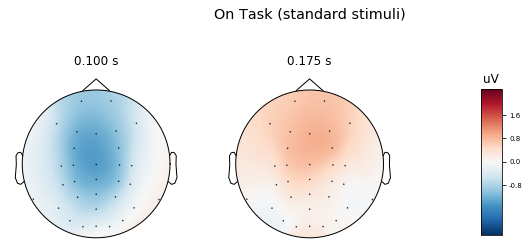

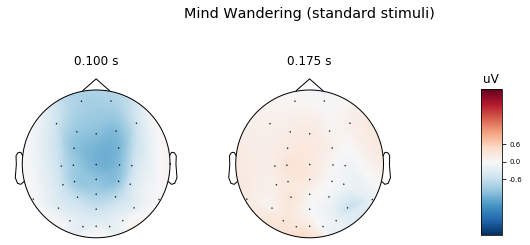

In [6]:
diff_gavg = {}

times = [0.100, 0.175]

ot_std = gavg['OT/Standard'].plot_topomap(times=times ,
                              ch_type='eeg', 
                              vmin = -2.5,
                              vmax = 2.5,
                              show_names=False, 
                              average=0.050,
                              colorbar=True, sensors=True, contours=False, size=2, res=128, 
                              title=str('On Task (standard stimuli)'));

ot_std.dpi = 72
ot_std.savefig('ot_std.png')

mw_std = gavg['MW/Standard'].plot_topomap(times=times ,
                              ch_type='eeg', 
                              vmin = -2.5,
                              vmax = 2.5,
                              show_names=False, 
                              average=0.050,
                              colorbar=True, sensors=True, contours=False, size=2, res=128, 
                              title=str('Mind Wandering (standard stimuli)'));

mw_std.dpi = 72
mw_std.savefig('mw_std.png')

## Key maps - oddballs

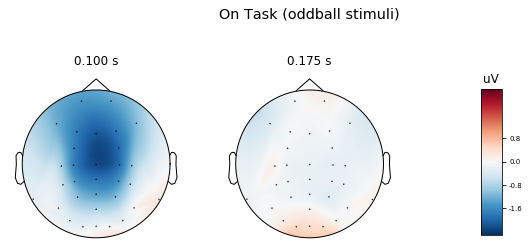

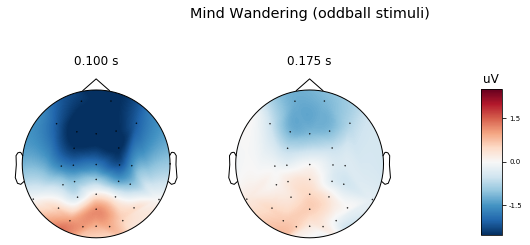

In [7]:
diff_gavg = {}

times = [0.100, 0.175]

ot_odd = gavg['OT/Oddball'].plot_topomap(times=times ,
                              ch_type='eeg', 
                              vmin = -2.5,
                              vmax = 2.5,
                              show_names=False, 
                              average=0.050,
                              colorbar=True, sensors=True, contours=False, size=2, res=128, 
                              title=str('On Task (oddball stimuli)'));

ot_odd.dpi = 72
ot_odd.savefig('ot_odd.png')

mw_odd = gavg['MW/Oddball'].plot_topomap(times=times ,
                              ch_type='eeg', 
                              vmin = -2.5,
                              vmax = 2.5,
                              show_names=False, 
                              average=0.050,
                              colorbar=True, sensors=True, contours=False, size=2, res=128, 
                              title=str('Mind Wandering (oddball stimuli)'));

mw_odd.dpi = 72
mw_odd.savefig('mw_odd.png')

## Differences

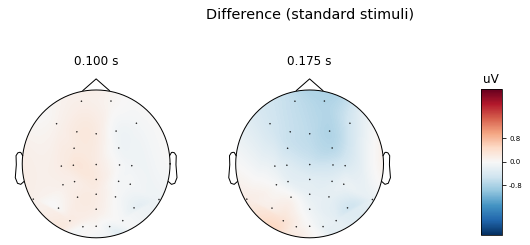

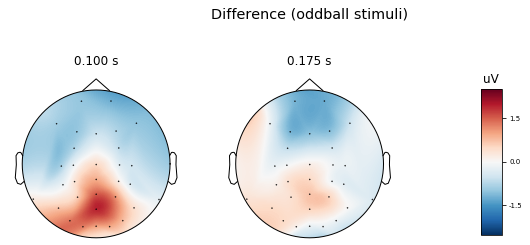

In [8]:
times = [0.100, 0.175]

std_diff = mne.combine_evoked([gavg['MW/Standard'], -gavg['OT/Standard']], weights='equal')

std_plot = std_diff.plot_topomap(times=times ,
                              ch_type='eeg', 
                              vmin = -2.5,
                              vmax = 2.5,
                              show_names=False, 
                              average=0.050,
                              colorbar=True, sensors=True, contours=False, size=2, res=128, 
                              title=str('Difference (standard stimuli)'));

std_plot.dpi = 160
std_plot.savefig('std_diff.png')

odd_diff = mne.combine_evoked([gavg['MW/Oddball'], -gavg['OT/Oddball']], weights='equal')

odd_plot = odd_diff.plot_topomap(times=times ,
                              ch_type='eeg', 
                              vmin = -2.5,
                              vmax = 2.5,
                              show_names=False, 
                              average=0.050,
                              colorbar=True, sensors=True, contours=False, size=2, res=128, 
                              title=str('Difference (oddball stimuli)'));

odd_plot.dpi = 160
odd_plot.savefig('odd_diff.png')

# Contrasts between condition extremes centered around Pz
We can see clear differences in oscillatory activtiy though not necessarily peaks.

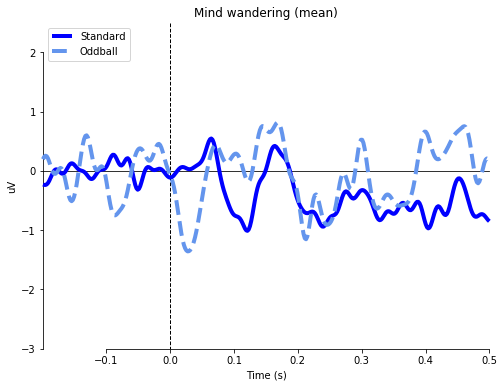

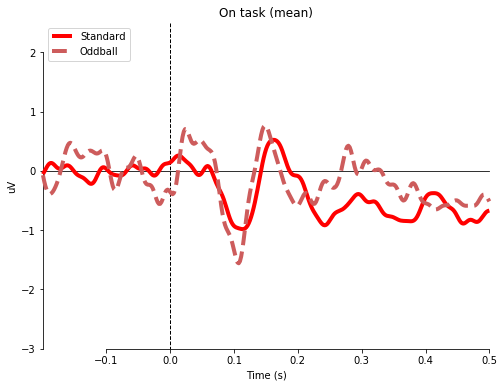

In [9]:
%matplotlib inline

picks = [gavg['MW/Standard'].ch_names.index('Pz'), 
         gavg['MW/Standard'].ch_names.index('P3'), 
         gavg['MW/Standard'].ch_names.index('P4'), 
         gavg['MW/Standard'].ch_names.index('POz'), 
         gavg['MW/Standard'].ch_names.index('Oz'), 
         gavg['MW/Standard'].ch_names.index('CPz'),  #CP3
        ]

ots = gavg['OT/Standard'].crop(-0.2,0.5)
oto = gavg['OT/Oddball'].crop(-0.2,0.5)

mws = gavg['MW/Standard'].crop(-0.2,0.5)
mwo = gavg['MW/Oddball'].crop(-0.2,0.5)

mw = {'Standard':mws, 'Oddball':mwo}
ot = {'Standard':ots, 'Oddball':oto}

styles = {'Standard':{'linewidth':4},
          'Oddball':{'linewidth':4}
         }


mne.viz.plot_compare_evokeds(mw, 
                             picks=picks, 
                             ylim = dict(eeg=[-3, 2.5]), 
                             styles=styles, 
                             colors=['blue','cornflowerblue'],
                             linestyles=['-','--'],
                             title="Mind wandering",
                             combine='mean')

mne.viz.plot_compare_evokeds(ot, 
                             picks=picks, 
                             ylim = dict(eeg=[-3, 2.5]), 
                             styles=styles,
                             colors=['red','indianred'],
                             linestyles=['-','--'],
                             title="On task",
                             combine='mean');

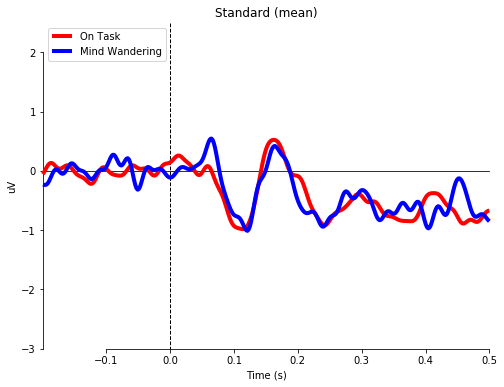

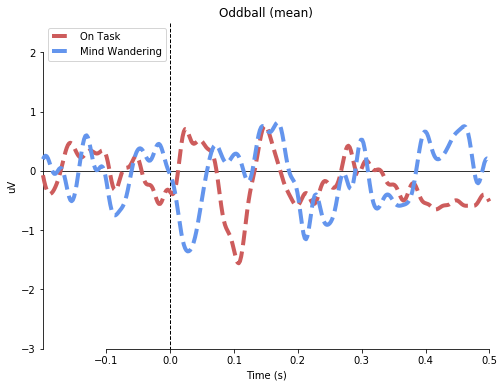

In [10]:
st = {'On Task':ots, 'Mind Wandering':mws}
ob = {'On Task':oto, 'Mind Wandering':mwo}


styles = {'On Task':{'linewidth':4},
          'Mind Wandering':{'linewidth':4}
         }

mne.viz.plot_compare_evokeds(st, 
                             picks=picks, 
                             ylim = dict(eeg=[-3, 2.5]), 
                             styles=styles, 
                             colors=['red','blue'],
                             linestyles=['-','-'],
                             title="Standard",
                             combine='mean')

mne.viz.plot_compare_evokeds(ob, 
                             picks=picks, 
                             ylim = dict(eeg=[-3, 2.5]), 
                             styles=styles, 
                             colors=['indianred','cornflowerblue'],
                             linestyles=['--','--'],
                             title="Oddball",
                             combine='mean');

# Contrasts between condition extremes centered around Fz
There appear to be differences between the P2 centered around Fz.

In [11]:
gavg_back

{'OT/Standard': <Evoked  |  'Grand average (n = 83)' (average, N=83), [-0.19922, 0.5] sec, 32 ch, ~178 kB>,
 'MW/Standard': <Evoked  |  'Grand average (n = 52)' (average, N=52), [-0.19922, 0.5] sec, 32 ch, ~178 kB>,
 'OT/Oddball': <Evoked  |  'Grand average (n = 83)' (average, N=83), [-0.19922, 0.5] sec, 32 ch, ~178 kB>,
 'MW/Oddball': <Evoked  |  'Grand average (n = 51)' (average, N=51), [-0.19922, 0.5] sec, 32 ch, ~178 kB>}

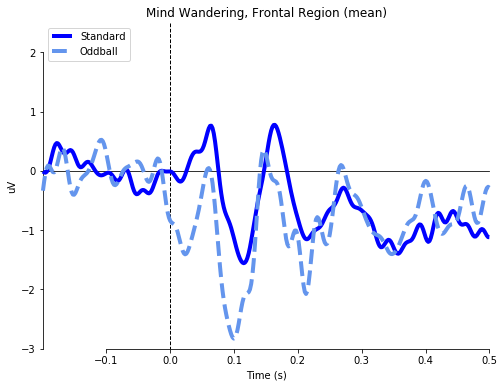

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


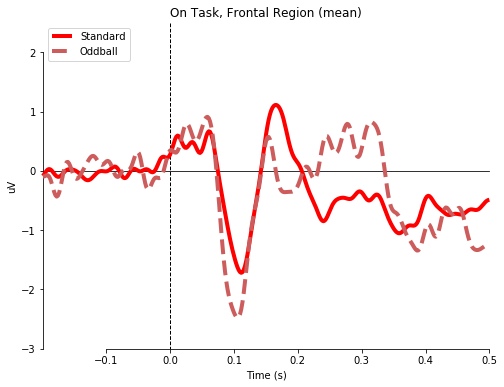

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


In [12]:
%matplotlib inline

picks = [gavg['OT/Standard'].ch_names.index('Fz'), 
         gavg['OT/Standard'].ch_names.index('F3'), 
         gavg['OT/Standard'].ch_names.index('F4'),
         gavg['OT/Standard'].ch_names.index('FC3'), 
         gavg['OT/Standard'].ch_names.index('FC4'), 
         gavg['OT/Standard'].ch_names.index('Cz'), 
         gavg['OT/Standard'].ch_names.index('C3'), 
         gavg['OT/Standard'].ch_names.index('C4'), 
        ]

ots = gavg['OT/Standard'].crop(-0.2,0.5)
oto = gavg['OT/Oddball'].crop(-0.2,0.5)

mws = gavg['MW/Standard'].crop(-0.2,0.5)
mwo = gavg['MW/Oddball'].crop(-0.2,0.5)

mw = {'Standard':mws, 'Oddball':mwo}
ot = {'Standard':ots, 'Oddball':oto}

styles = {'Standard':{'linewidth':4},
          'Oddball':{'linewidth':4}
         }


mw_wave = mne.viz.plot_compare_evokeds(mw, 
                             picks=picks, 
                             ylim = dict(eeg=[-3, 2.5]), 
                             styles=styles, 
                             colors=['blue','cornflowerblue'],
                             linestyles=['-','--'],
                             title="Mind Wandering, Frontal Region",
                             combine='mean')

mw_wave[0].savefig('wave_mw.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

ot_wave = mne.viz.plot_compare_evokeds(ot, 
                             picks=picks, 
                             ylim = dict(eeg=[-3, 2.5]), 
                             styles=styles,
                             colors=['red','indianred'],
                             linestyles=['-','--'],
                             title="On Task, Frontal Region",
                             combine='mean');

ot_wave[0].savefig('wave_ot.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

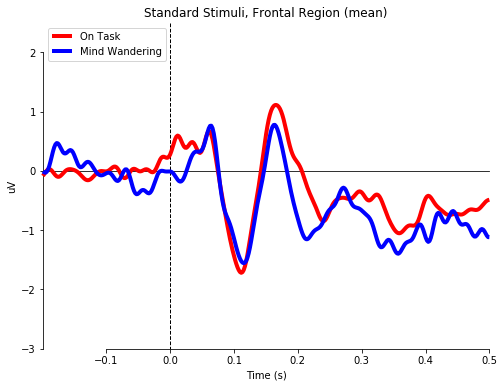

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


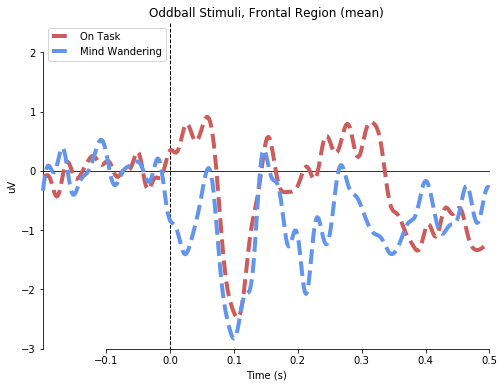

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


In [13]:
st = {'On Task':ots, 'Mind Wandering':mws}
ob = {'On Task':oto, 'Mind Wandering':mwo}


styles = {'On Task':{'linewidth':4},
          'Mind Wandering':{'linewidth':4}
         }

std_wave = mne.viz.plot_compare_evokeds(st, 
                             picks=picks, 
                             ylim = dict(eeg=[-3, 2.5]), 
                             styles=styles, 
                             colors=['red','blue'],
                             linestyles=['-','-'],
                             title="Standard Stimuli, Frontal Region",
                             combine='mean')

std_wave[0].savefig('wave_std.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

odd_wave = mne.viz.plot_compare_evokeds(ob, 
                             picks=picks, 
                             ylim = dict(eeg=[-3, 2.5]), 
                             styles=styles, 
                             colors=['indianred','cornflowerblue'],
                             linestyles=['--','--'],
                             title="Oddball Stimuli, Frontal Region",
                             combine='mean');

odd_wave[0].savefig('wave_odd.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)